In [1]:
sc.install_pypi_package("boto3")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1638588811911_0004,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/13/21/30ad774b8ee7e8726f37623ce85aedb37f0d45c88ac3f83680807752c413/boto3-1.20.20-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/ab/84/fc3717a7b7f0f6bb08af593127171f08e3e0087c197922da09c01bfe7c3a/s3transfer-0.5.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/24/1a/81f378fab38926e798f16d380731f40160559f3ef43fd1fb82bc6bef7dc1/botocore-1.23.20-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/af/f4/524415c0744552cce7d8bf3669af78e8a069514405ea4fcbd0cc44733744/urllib3-1.26.7-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/36/7a/87837f39d0296e723bb9b62bbb257d0355c7f6128853c78955f57342a56d/python_dateutil-2.8.2-py2.py3-none-any.whl

You are using pip version 9.0.1, however version 21.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.

In [2]:
import boto3

s3 = boto3.resource('s3')
bucket = 'amazon-reviews-pds'
bucket_resource = s3.Bucket(bucket)

for obj in bucket_resource.objects.all():
    if 'parquet' in obj.key and 'Books' in obj.key:
        print(obj.last_modified,"\t", round(obj.size * 1e-9), "GB\t",
              obj.key, "\n")
data = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Books/*.parquet')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

2018-04-09 06:35:58+00:00 	 1 GB	 parquet/product_category=Books/part-00000-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet 

2018-04-09 06:35:59+00:00 	 1 GB	 parquet/product_category=Books/part-00001-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet 

2018-04-09 06:36:00+00:00 	 1 GB	 parquet/product_category=Books/part-00002-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet 

2018-04-09 06:36:00+00:00 	 1 GB	 parquet/product_category=Books/part-00003-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet 

2018-04-09 06:36:00+00:00 	 1 GB	 parquet/product_category=Books/part-00004-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet 

2018-04-09 06:36:33+00:00 	 1 GB	 parquet/product_category=Books/part-00005-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet 

2018-04-09 06:36:35+00:00 	 1 GB	 parquet/product_category=Books/part-00006-495c48e6-96d6-4650-aa65-3c36a3516ddd.c000.snappy.parquet 

2018-04-09 06:36:35+00:00 	 1 GB	 parquet/product_categ

In [3]:
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("scipy==1.4.1")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.1")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/4a/6a/94b219b8ea0f2d580169e85ed1edc0163743f55aaeca8a44c2e8fc1e344e/pandas-1.0.3-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/dd/82/c1fe128f3526b128cfd185580ba40d01371c5d299fcf7f77968e22dfcc2e/scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl

  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/a0/34/895006117f6fce0b4de045c87e154ee4a20c68ec0a4c9a36d900888fb6bc/pyparsing-3.0.6-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5c/f9/695d6bedebd747e5eb0fe8fad57b72fdf25411273a39791cde838d5a8f51/cycler-0.11.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/09/6b/6e567cb2e86d4e5939a9233f8734e26021b6a9c1bc4b1edccba236a84cc2/kiwisolver-1.3.2-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x

----

In [4]:
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

In [5]:
# original data plus good_review dummy
data_good = data.withColumn('good_review', (data.star_rating >= 4).cast("integer"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
#counting good reviews
good_count = (data_good.groupBy('good_review')
             .count())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [7]:
l_val = good_count.collect()
num_good = 0
num_bad = 0

if l_val[0][0] == 1:
    num_good = l_val[0][1]
    num_bad = l_val[1][1]
else:
    num_good = l_val[1][1]
    num_bad = l_val[0][1]
frac_bg = num_bad/num_good

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
good_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+--------+
|good_review|   count|
+-----------+--------+
|          1|17208450|
|          0| 3517710|
+-----------+--------+

In [9]:
# balanced data with good_review dummy
new_data = data_good.sampleBy("good_review", fractions={0: 1, 1: float(frac_bg)}, seed=1234)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
new_count = (new_data.groupBy('good_review')
             .count())
new_count.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------+
|good_review|  count|
+-----------+-------+
|          1|3516934|
|          0|3517710|
+-----------+-------+

In [11]:
new_count.collect()[0][1]/new_count.collect()[1][1]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.999779401940467

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

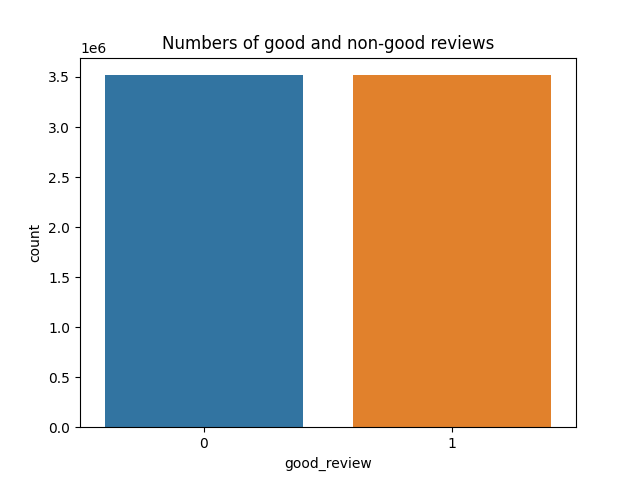

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

df = new_count.toPandas()

sns.barplot(x='good_review', y='count', data=df)
plt.title('Numbers of good and non-good reviews')
%matplot plt

----

Q3a

In [13]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
from pyspark.sql.functions import size
from pyspark.ml import Pipeline
tokenizer = Tokenizer(inputCol='review_body', outputCol='text')
remover = StopWordsRemover(inputCol=tokenizer.getOutputCol(), outputCol='word_lst')
pipeline = Pipeline(stages=[tokenizer,remover])
new_data = new_data.na.drop()
new_data = pipeline.fit(new_data).transform(new_data)
new_data = new_data.withColumn('body_length', size('word_lst'))
# Additional 1: Chose length of review body as a covariate because usually longer reviews should 
# be given to more favored books.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [14]:
new_data = new_data.withColumn('verified', (new_data.verified_purchase == "Y").cast('integer'))
# Additional 2: Chose whether a purchase is verified because not verified reviews can be noisy
# and may not actually relate to quality/ratings of the books.
new_data = new_data.withColumn('In_US', (new_data.marketplace == "US").cast('integer'))
# Additional 3: Chose the marketplace to be in the US as most good reviews come from the US.
new_data = new_data.withColumn('total_votes', (new_data.total_votes).cast("integer"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Q3b

In [15]:
train, test = new_data.randomSplit([0.7, 0.3])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
features = ['total_votes', 
            'body_length', 
            'verified',
            'In_US']
assembler = VectorAssembler(inputCols = features, outputCol = 'features',handleInvalid='skip')
lr = LogisticRegression(featuresCol='features', labelCol='good_review')
pipeline = Pipeline(stages = [assembler, lr])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Q4

In [17]:
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
import numpy as np
paramGrid = ParamGridBuilder()\
    .addGrid(lr.regParam,  np.arange(0, .1, 0.01))\
    .addGrid(lr.elasticNetParam, [0, 1])\
    .build()

evaluator = BinaryClassificationEvaluator().setLabelCol('good_review')
cv = CrossValidator(estimator = pipeline,
                    estimatorParamMaps = paramGrid,
                    evaluator = evaluator,
                    numFolds = 5, seed = 0)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [18]:
# Downsizing the sample for computation time concern.
train_sample = train.sample(fraction=0.00001)
test_sample = test.sample(fraction=0.00001)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [19]:
#fit model
model = cv.fit(train_sample)


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Exception in thread cell_monitor-19:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 1069



In [20]:
print("Train AUC:", evaluator.evaluate(model.transform(train_sample), {evaluator.metricName: "areaUnderROC"}))
print("Test AUC:", evaluator.evaluate(model.transform(test_sample), {evaluator.metricName: "areaUnderROC"}))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Train AUC: 0.7793560606060607
Test AUC: 0.4954545454545455

Exception in thread cell_monitor-20:
Traceback (most recent call last):
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/mnt/notebook-env/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/notebook-env/lib/python3.7/site-packages/awseditorssparkmonitoringwidget-1.0-py3.7.egg/awseditorssparkmonitoringwidget/cellmonitor.py", line 178, in cell_monitor
    job_binned_stages[job_id][stage_id] = all_stages[stage_id]
KeyError: 14197



In [21]:
trainingSummary = model.bestModel.stages[-1].summary
print("Training AUC: " + str(trainingSummary.areaUnderROC))

print("\nFalse positive rate by label (Training):")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))
print("\nTrue positive rate by label (Training):")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))    
print("\nTraining Accuracy: " + str(trainingSummary.accuracy))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Training AUC: 0.7793560606060604

False positive rate by label (Training):
label 0: 0.25
label 1: 0.45454545454545453

True positive rate by label (Training):
label 0: 0.5454545454545454
label 1: 0.75

Training Accuracy: 0.6521739130434783